<a href="https://colab.research.google.com/github/leductinh/Detection/blob/main/Nh%E1%BA%ADn_di%E1%BB%87n_10_m%C3%B3n_%C4%83n_4_lo%E1%BA%A1i_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cats & Dogs**

**Images of cats and dogs are put together into a folder (train)**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Đọc ảnh dog
folder = '/content/drive/MyDrive/Colab Notebooks/cats_dogs/train/'
for i in range(9):
  plt.subplot(330 + i +1)
  filename = folder + 'dog.' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()
# Đọc ảnh cat
for i in range(9):
  plt.subplot(330 + i +1)
  filename = folder + 'cat.' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder = '/content/drive/MyDrive/Colab Notebooks/cats_dogs/train/'

photos, labels = list(), list()
for file in listdir(folder):
  output = 0
  if file.startswith('cat'):
    output = 1.0
  photo = load_img(folder + file, target_size=(200,200))
  photo = img_to_array(photo)  # O dong nay anh da bi thay doi.
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# print(photos, labels)

save('dog_vs_cat_photos.npy', photos)
save('dog_vs_cat_labels.npy', labels)

(2000, 200, 200, 3) (2000,)


In [ ]:
plt.imshow(photos[0])
photos[0].shape
print(labels[100])

Up code lên github, kaggle

**Tạo model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(2, activation='sigmoid'))

model.add(Flatten())

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])  # Output chỉ có dog hoặc cat (0 hoặc 1) nên dùng binary_crossentropy, nếu nhiều output dùng categorical_crossentropy?
history = model.fit(photos, labels, epochs=5, batch_size=64, verbose=1)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D # BatchNormalization: để dùng GPU ko lỗi
from keras.models import Model
model = VGG16(include_top=False, input_shape=(200, 200, 3))
for layer in model.layers:
  layer.trainable = False

flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(2, activation='sigmoid')(class1)
model = Model(inputs=model.inputs, outputs=output)
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, epochs=1, verbose=1)


In [ ]:
model.save('cat_dog.h5')

In [ ]:
from keras.models import load_model
model = load_model('cat_dog.h5')

In [ ]:
# import numpy as np
# photos, labels = np.load('dog_vs_cat_photos.npy', encoding='bytes')

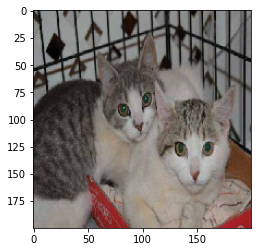

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('/content/drive/MyDrive/Colab Notebooks/cats_dogs/validation/cat.1032.jpg', target_size=(200,200))
plt.imshow(img)

In [ ]:
import numpy as np
# imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)
imgRe = imgRe.astype('float32')
imgRe /= 255
print(model.predict(imgRe))
np.argmax(model.predict(imgRe), axis=1)

[[0.93467844 1.        ]]


array([1])

#**Palm Lines Detection**

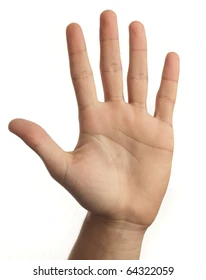

-1

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

image = cv2.imread("palm1.jpg")

cv2_imshow(image) #to view the palm in python
cv2.waitKey(0)

In [ ]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

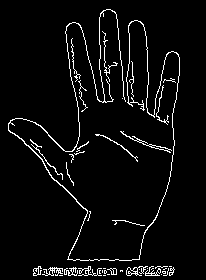

-1

In [ ]:
edges = cv2.Canny(gray, 50, 150,apertureSize = 3)
cv2_imshow(edges)
cv2.waitKey(0)

In [ ]:
edges = cv2.bitwise_not(edges)

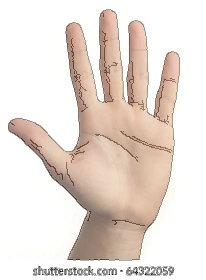

In [ ]:
cv2.imwrite("palmlines.jpg", edges)
palmlines = cv2.imread("palmlines.jpg")
img = cv2.addWeighted(palmlines, 0.3, image, 0.7, 0)
cv2_imshow(img) #to view the palm in python

#**Nhận diện 10 món ăn**

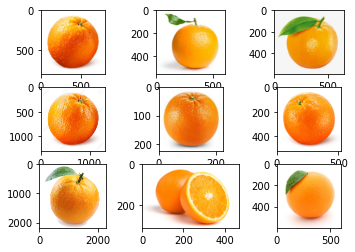

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder = '/content/drive/MyDrive/Colab Notebooks/fruitsDetection/'
for i in range(9):
  plt.subplot(330 + i +1)
  filename = folder + 'cam.' + str(i + 1) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder = '/content/drive/MyDrive/Colab Notebooks/fruitsDetection/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('cam'):
    output = 0.0
  elif file.startswith('chuoi'):
    output = 1.0
  elif file.startswith('dua'):
    output = 2.0
  elif file.startswith('thom'):
    output = 3.0
  elif file.startswith('duahau'):
    output = 4.0
  elif file.startswith('thanhlong'):
    output = 5.0
  elif file.startswith('tao'):
    output = 6.0
  elif file.startswith('mangcut'):
    output = 7.0
  elif file.startswith('mit'):
    output = 8.0
  elif file.startswith('dau'):
    output = 9.0
  photo = load_img(folder + file, target_size=(200,200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

save('10fruits.npy', photos)
save('10fruits.npy', labels)


(100, 200, 200, 3) (100,)


**Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200,200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))



**Compile**

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=64,epochs=20, verbose=1)
model.save('Fruits_model.h5')
classes = ["cam","chuoi","dua","thom","duahau","thanhlong","tao","mangcut","mit","dau"]

Epoch 1/20
2/2 [==============================] - 1s 76ms/step - loss: 16.0431 - accuracy: 0.6800
Epoch 2/20
2/2 [==============================] - 0s 55ms/step - loss: 6.3181 - accuracy: 0.5400
Epoch 3/20
2/2 [==============================] - 0s 49ms/step - loss: 1.3765 - accuracy: 0.5800
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 1.0949 - accuracy: 0.6500
Epoch 5/20
2/2 [==============================] - 0s 56ms/step - loss: 0.9398 - accuracy: 0.7200
Epoch 6/20
2/2 [==============================] - 0s 53ms/step - loss: 0.6204 - accuracy: 0.8300
Epoch 7/20
2/2 [==============================] - 0s 49ms/step - loss: 0.2366 - accuracy: 0.9200
Epoch 8/20
2/2 [==============================] - 0s 54ms/step - loss: 0.1958 - accuracy: 0.9700
Epoch 9/20
2/2 [==============================] - 0s 54ms/step - loss: 0.4257 - accuracy: 0.8900
Epoch 10/20
2/2 [==============================] - 0s 51ms/step - loss: 0.2010 - accuracy: 0.9400
Epoch 11/20
2/2 [===========

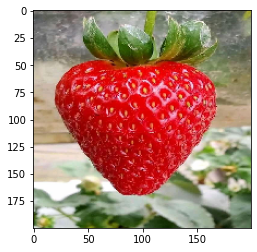

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('test9.jpg', target_size=(200,200))
plt.imshow(img)

In [ ]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  # 1: 1 ảnh, kích thước 32x32, 3 kênh màu, cifar10 nhận diện ảnh 32x32
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes)
print(classes[y_classes[0]])

[[0.10344069 0.10223211 0.10109369 0.09228444 0.08288831 0.10917444
  0.10119404 0.10244666 0.09411192 0.11113372]]
[9]
dau


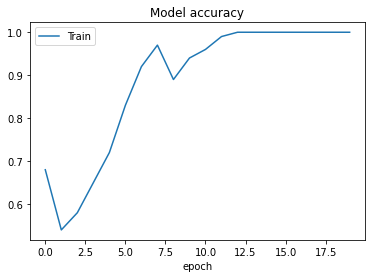

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#**Nhận diện 10 loại bánh**

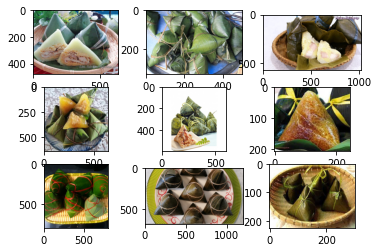

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder = '/content/drive/MyDrive/Colab Notebooks/foodsDetection/'
for i in range(9):
  plt.subplot(330 + i +1)
  filename = folder + 'banhu.' + str(i + 1) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder = '/content/drive/MyDrive/Colab Notebooks/foodsDetection/train/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('banhu'):
    output = 0.0
  elif file.startswith('banhchung'):
    output = 1.0
  elif file.startswith('banhbao'):
    output = 2.0
  elif file.startswith('banhcong'):
    output = 3.0
  elif file.startswith('banhgai'):
    output = 4.0
  elif file.startswith('banhtaiyen'):
    output = 5.0
  elif file.startswith('banhtaiheo'):
    output = 6.0
  elif file.startswith('banhtam'):
    output = 7.0
  elif file.startswith('banhtet'):
    output = 8.0
  elif file.startswith('banhxeo'):
    output = 9.0
  photo = load_img(folder + file, target_size=(200,200))
  photo = img_to_array(photo)  # O dong nay anh da bi thay doi.
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# print(photos[20], labels[20])

save('10foods.npy', photos)
save('10foods.npy', labels)

# 0: banh u, 1: banh chung, 2: banh bao, 3: banh cong, 4: banh gai, 5: banh tai yen, 6: banh tai heo, 7: banh tam, 8: banh tet, 9: banh xeo.

(120, 200, 200, 3) (120,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200,200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=64,epochs=20, verbose=1)
model.save('Fruits_model.h5')
classes = ["banhu","banhchung","banhbao","banhcong","banhgai","banhtaiyen","banhtaiheo","banhtam","banhtet","banhxeo"]


[[0.11061776 0.09923867 0.09277555 0.10173021 0.0983353  0.08976035
  0.10507623 0.09795833 0.10427625 0.10023138]]
[0]
banhu


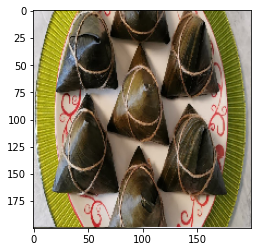

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
img = load_img('test3.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes)
print(classes[y_classes[0]])

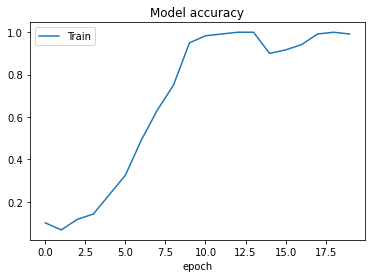

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#**Nhận diện 11 loại tiền**

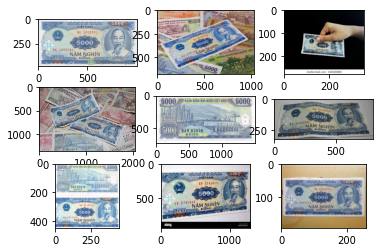

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder = '/content/drive/MyDrive/Colab Notebooks/moneyDetection/'
for i in range(9):
  plt.subplot(330 + i +1)
  filename = folder + '5k.' + str(i + 1) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder = '/content/drive/MyDrive/Colab Notebooks/moneyDetection/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('200.'):
    output = 0.0
  elif file.startswith('1k.'):
    output = 1.0
  elif file.startswith('2k'):
    output = 2.0
  elif file.startswith('5k'):
    output = 3.0
  elif file.startswith('10k'):
    output = 4.0
  elif file.startswith('20k'):
    output = 5.0
  elif file.startswith('50k'):
    output = 6.0
  elif file.startswith('100k'):
    output = 7.0
  elif file.startswith('200k'):
    output = 8.0
  elif file.startswith('500k'):
    output = 9.0
  photo = load_img(folder + file, target_size=(200,200))
  photo = img_to_array(photo)  # O dong nay anh da bi thay doi.
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

save('10foods.npy', photos)
save('10foods.npy', labels)


(110, 200, 200, 3) (110,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200,200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=64,epochs=20, verbose=1)
model.save('Fruits_model.h5')
classes = ["100","200","1k","2k","5k","10k","20k","50k","100k","200k","500k"]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
img = load_img('test10.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes)
print(classes[y_classes[0]])

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#**Nhận diện 4 loại hoa**

link data: https://drive.google.com/drive/u/2/folders/1uWY8lQ-ZE5tjCHlhe6TWip_fT76KZ4PB

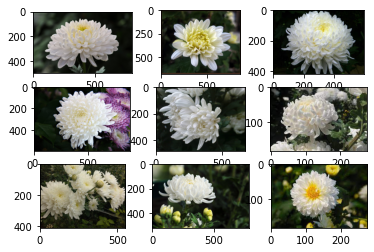

In [14]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder = '/content/drive/MyDrive/Colab Notebooks/flowersDetection/'
for i in range(9):
  plt.subplot(330 + i +1)
  filename = folder + 'cuc.' + str(i + 1) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [15]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder = '/content/drive/MyDrive/Colab Notebooks/flowersDetection/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('cuc'):
    output = 0.0
  elif file.startswith('thuocduoc'):
    output = 1.0
  elif file.startswith('huongduong'):
    output = 2.0
  elif file.startswith('vantho'):
    output = 3.0

  photo = load_img(folder + file, target_size=(150,150))
  photo = img_to_array(photo) 
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

save('4flowers_photos.npy', photos)
save('4flowers_labels.npy', labels)


(40, 150, 150, 3) (40,)


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='sigmoid'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=64,epochs=20, verbose=1)
model.save('Flowers_model.h5')
classes = ['cuc', 'thuocduoc', 'huongduong', 'vantho']


Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 28.5417 - accuracy: 0.2250
Epoch 2/20
1/1 [==============================] - 0s 96ms/step - loss: 455.4437 - accuracy: 0.3750
Epoch 3/20
1/1 [==============================] - 0s 86ms/step - loss: 179.5612 - accuracy: 0.2500
Epoch 4/20
1/1 [==============================] - 0s 85ms/step - loss: 302.6286 - accuracy: 0.2500
Epoch 5/20
1/1 [==============================] - 0s 79ms/step - loss: 255.8293 - accuracy: 0.2500
Epoch 6/20
1/1 [==============================] - 0s 77ms/step - loss: 161.3116 - accuracy: 0.2500
Epoch 7/20
1/1 [==============================] - 0s 77ms/step - loss: 63.8997 - accuracy: 0.2500
Epoch 8/20
1/1 [==============================] - 0s 73ms/step - loss: 38.9664 - accuracy: 0.4000
Epoch 9/20
1/1 [==============================] - 0s 69ms/step - loss: 6.6293 - accuracy: 0.5250
Epoch 10/20
1/1 [==============================] - 0s 71ms/step - loss: 0.2981 - accuracy: 0.9250
Epoch 11/20
1/1 [=

[[0.48041108 0.5031532  0.484982   0.48285505]]
[1]
thuocduoc


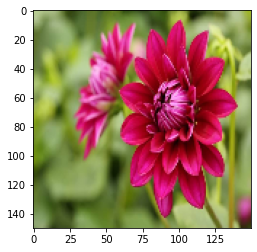

In [17]:
import matplotlib.pyplot as plt
import numpy as np

img = load_img('test15.jpg', target_size=(150,150))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes)
print(classes[y_classes[0]])

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()